In [1]:
#% matplotlib inline

from datetime import datetime 
import h5py
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
cmap = cm.get_cmap('Blues')
import random


target_user = 'Vlasits'

restriction_str = 'experimenter = "{}"'.format(target_user)

In [2]:
#pull data from hdf5 file
summary_df = pd.read_hdf('Data/Fig8.hdf5', 'summary_df')



#open from hdf5 file

#read hdf5 file for this notebook
f1 = h5py.File("Data/Fig8.hdf5", "r")
central_rois = np.array(f1['central_rois4'])


f1.close()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


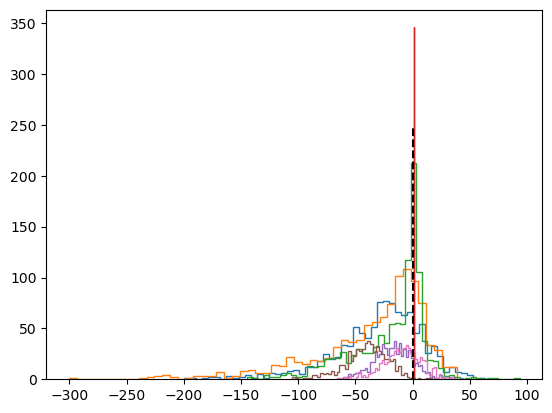

In [4]:
#plot histograms for each individual field
n_bins = 50

for i in range(7):
    if i==3:
        hist_df = summary_df[summary_df['field_num']==i+1]['dsi_150']
        hist_df = hist_df.index.isin(central_rois)
        plt.hist(hist_df, n_bins, histtype='step', label = 'field '+str(i+1))
    else:
        plt.hist(summary_df[summary_df['field_num']==i+1]['dsi_150'], n_bins, histtype='step', label = 'field '+str(i+1))

plt.vlines(0, 0, 250, linestyle='--')

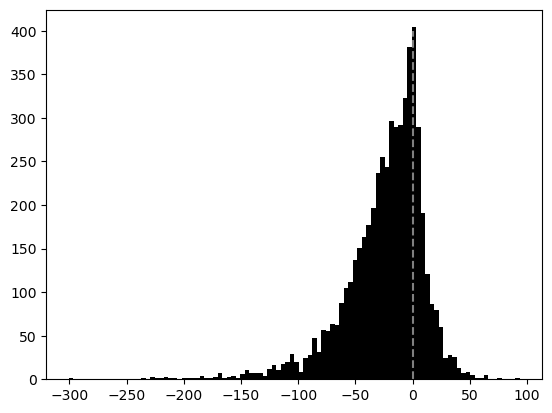

In [5]:
n_bins = 100
# plt.hist(summary_df['dsi_150'], n_bins, histtype='step', label='dsi_150') #density=True
plt.hist(summary_df['dsi_150'], n_bins, label='dsi_150', color='k')
plt.vlines(0, 0, 400, linestyle='--', color='grey')

# Figpath = 'Fig_temp/'
# savename = Figpath+"GCamp_hist_summary_allfield_new.pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')

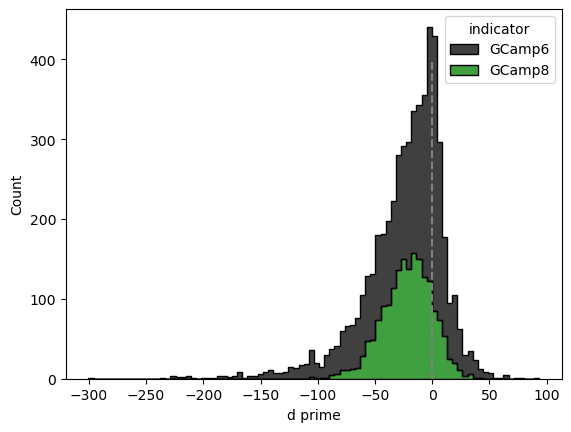

In [6]:
sns.histplot(x='dsi_150', hue='indicator', data=summary_df, multiple='stack', palette=["k", "g"],fill=True,element="step",)
plt.vlines(0, 0, 400, linestyle='--', color='grey')

axes = plt.gca()
axes.set_xlabel('d prime')

# Figpath = 'Fig_temp/'
# savename = Figpath+"GCamp_hist_summary_allfield_new_indicators.pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')

plt.show()